In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
df = pd.read_csv('student_spending.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   object
 2   year_in_school            1000 non-null   object
 3   major                     1000 non-null   object
 4   monthly_income            1000 non-null   int64 
 5   financial_aid             1000 non-null   int64 
 6   tuition                   1000 non-null   int64 
 7   housing                   1000 non-null   int64 
 8   food                      1000 non-null   int64 
 9   transportation            1000 non-null   int64 
 10  books_supplies            1000 non-null   int64 
 11  entertainment             1000 non-null   int64 
 12  personal_care             1000 non-null   int64 
 13  technology                1000 non-null   int64 
 14  health_wellness          

In [4]:
df.drop(columns=["age", "gender", "year_in_school", "major", "preferred_payment_method"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   monthly_income   1000 non-null   int64
 1   financial_aid    1000 non-null   int64
 2   tuition          1000 non-null   int64
 3   housing          1000 non-null   int64
 4   food             1000 non-null   int64
 5   transportation   1000 non-null   int64
 6   books_supplies   1000 non-null   int64
 7   entertainment    1000 non-null   int64
 8   personal_care    1000 non-null   int64
 9   technology       1000 non-null   int64
 10  health_wellness  1000 non-null   int64
 11  miscellaneous    1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [5]:
df["income"] = df["monthly_income"] + df["financial_aid"]
df.drop(columns=["monthly_income", "financial_aid"], inplace=True)
df.head()

,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,income
0,5939,709,296,123,188,41,78,134,127,72,1228
1,4908,557,365,85,252,74,92,226,129,68,1881
2,3051,666,220,137,99,130,23,239,112,133,1662
3,4935,652,289,114,223,99,30,163,105,55,882
4,3887,825,372,168,194,48,71,88,71,104,1332


In [6]:
df["non-essential"] = df["books_supplies"] + df["entertainment"] + df["miscellaneous"] + df["technology"]
df.drop(columns=["books_supplies", "entertainment", "miscellaneous", "technology"], inplace=True)
df.head()

,tuition,housing,food,transportation,personal_care,health_wellness,income,non-essential
0,5939,709,296,123,78,127,1228,435
1,4908,557,365,85,92,129,1881,620
2,3051,666,220,137,23,112,1662,601
3,4935,652,289,114,30,105,882,540
4,3887,825,372,168,71,71,1332,434


In [7]:
df["health"] = df["personal_care"] + df["health_wellness"]
df.drop(columns=["personal_care", "health_wellness"], inplace=True)
df.head()

,tuition,housing,food,transportation,income,non-essential,health
0,5939,709,296,123,1228,435,205
1,4908,557,365,85,1881,620,221
2,3051,666,220,137,1662,601,135
3,4935,652,289,114,882,540,135
4,3887,825,372,168,1332,434,142


### Actualmente un dolar se intercambia por 20.68 pesos (26/11/2024)

In [8]:
# df = df * 20.68
# df.head()

In [9]:
df["university"] = df["tuition"] / 12
df.drop(columns=["tuition"], inplace=True)
df.head()

,housing,food,transportation,income,non-essential,health,university
0,709,296,123,1228,435,205,494.916667
1,557,365,85,1881,620,221,409.000000
2,666,220,137,1662,601,135,254.250000
3,652,289,114,882,540,135,411.250000
4,825,372,168,1332,434,142,323.916667


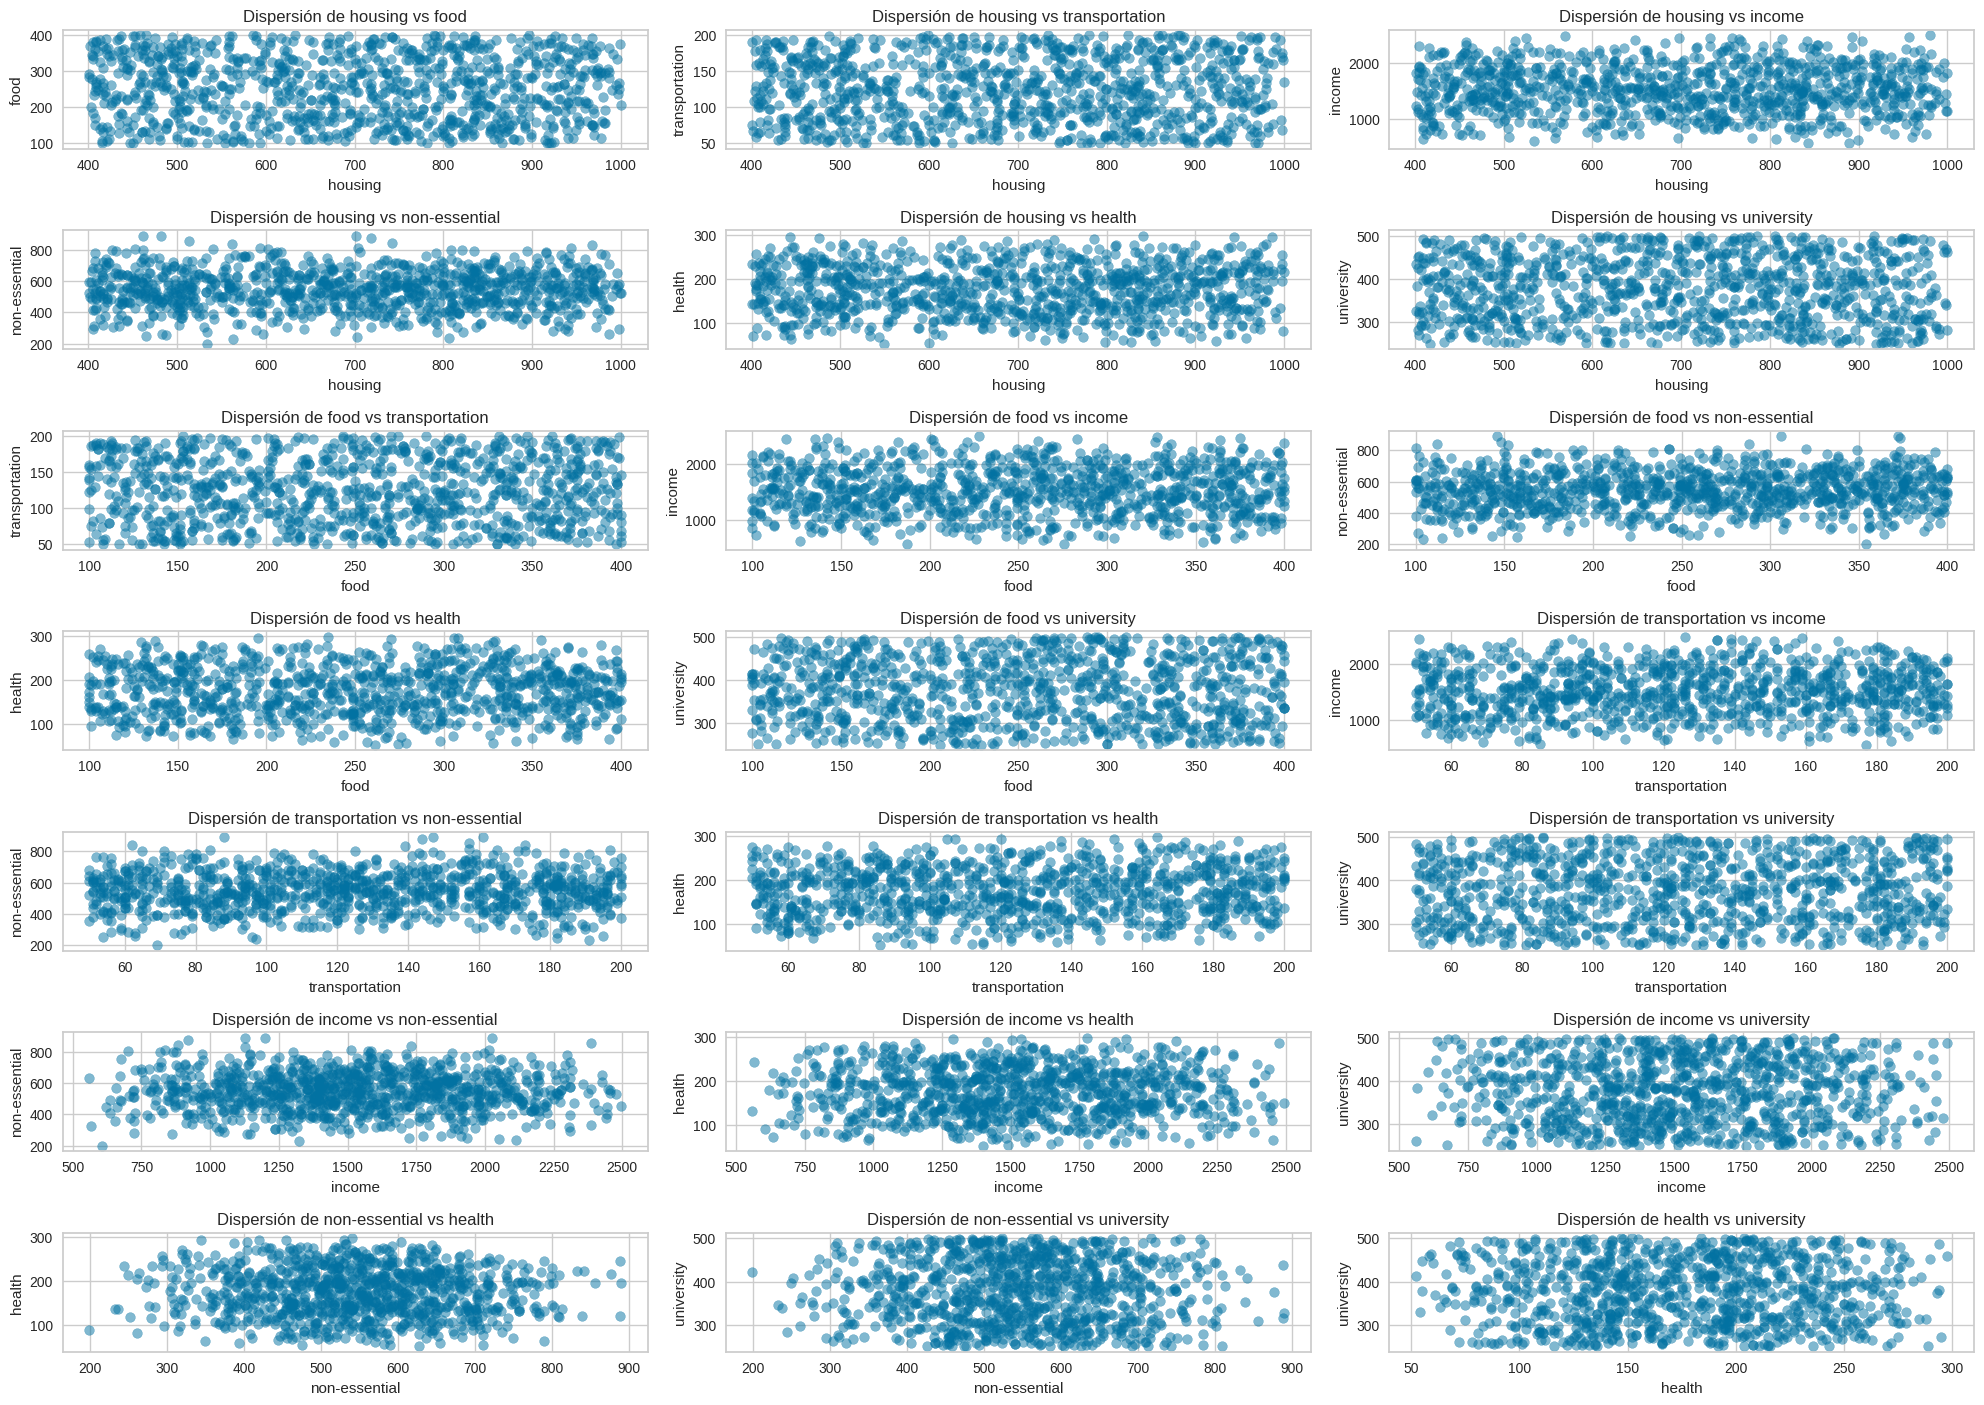

In [10]:
import itertools

combinations = list(itertools.combinations(df.columns, 2))

fig, axes = plt.subplots(50, 3, figsize=(20, 100))
axes = axes.flatten() 

for ax, (col1, col2) in zip(axes, combinations):
    ax.scatter(df[col1], df[col2], alpha=0.5)
    ax.set_title(f'Dispersión de {col1} vs {col2}')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.grid(True)

for ax in axes[len(combinations):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


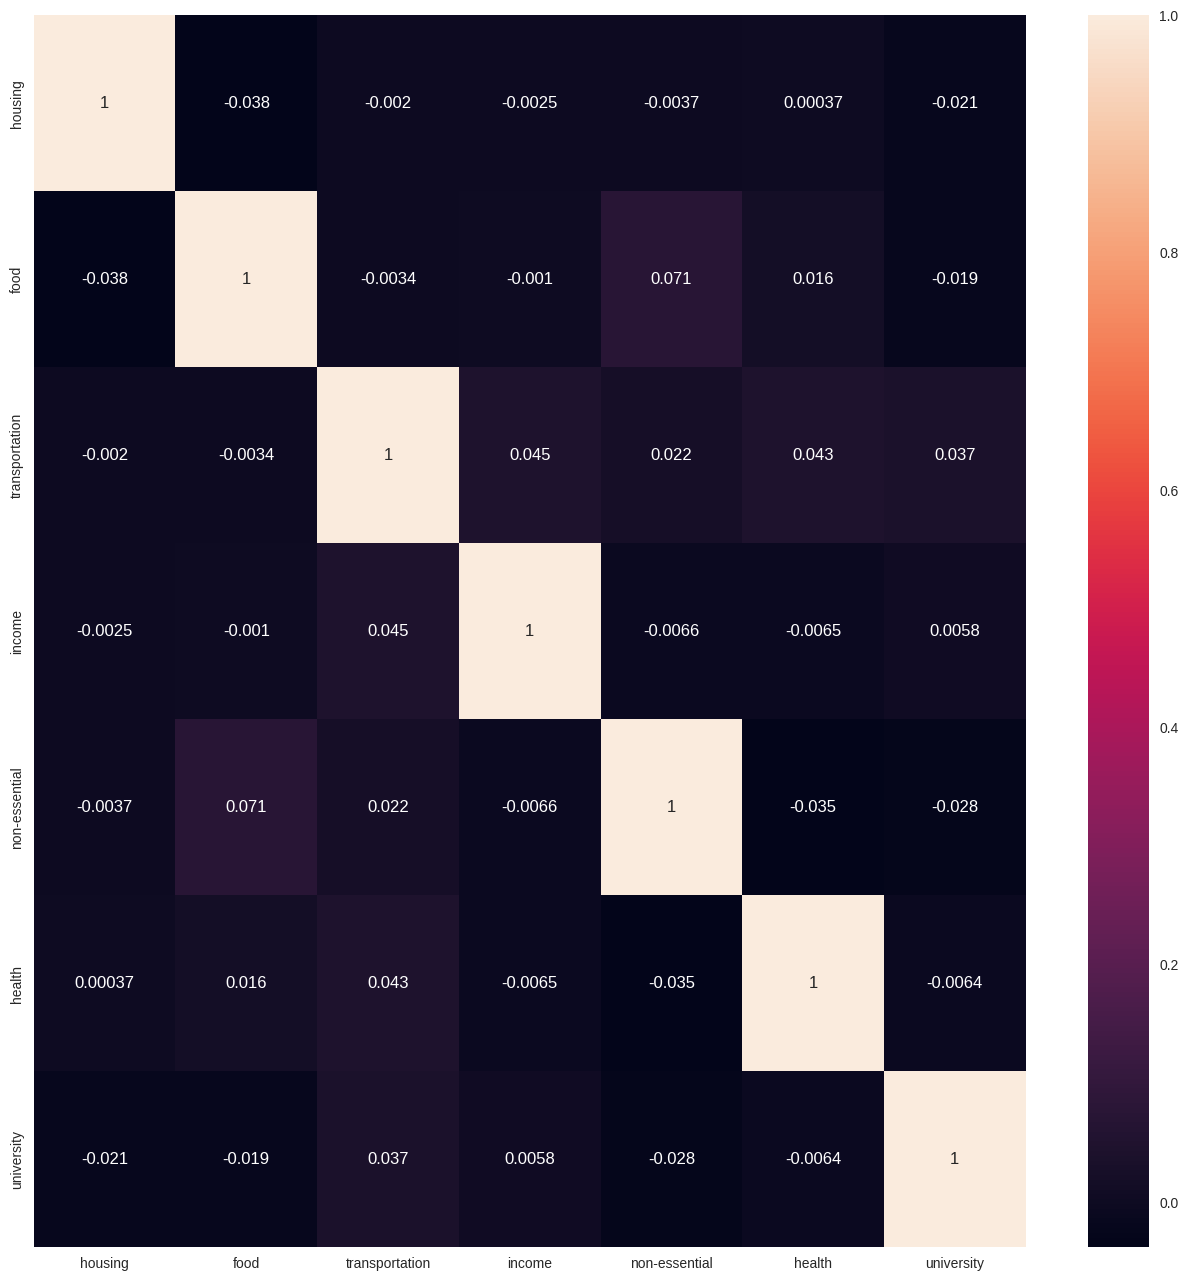

In [11]:
corr = df.corr(method='pearson')

plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True)
plt.show()

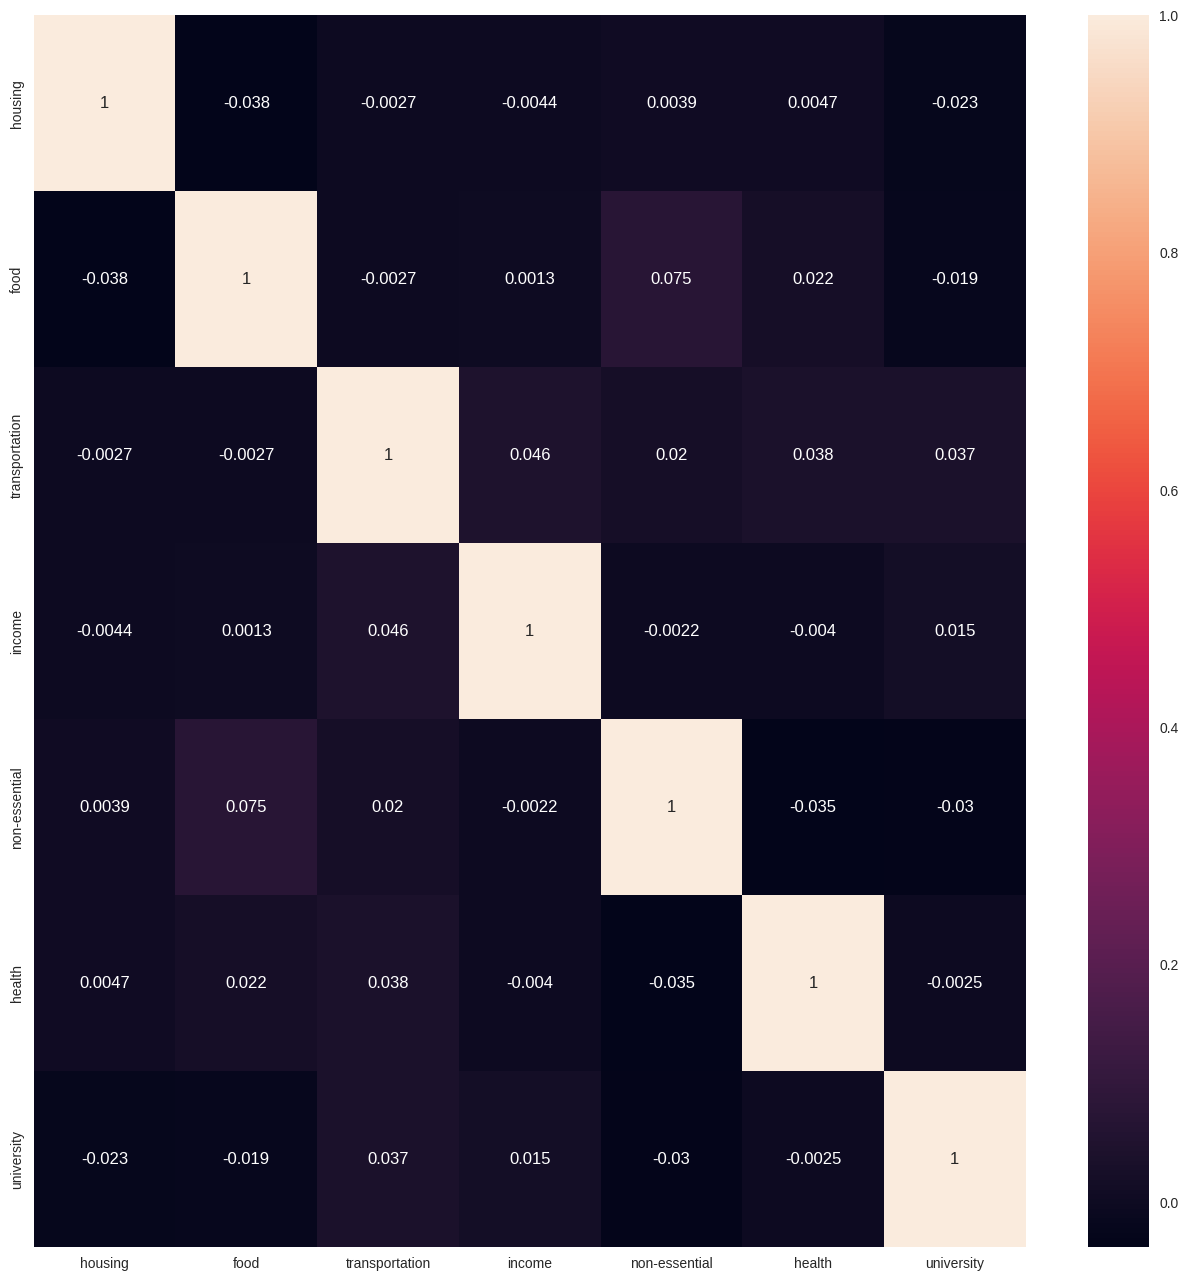

In [12]:
corr =  df.corr(method='spearman')

plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True)
plt.show()

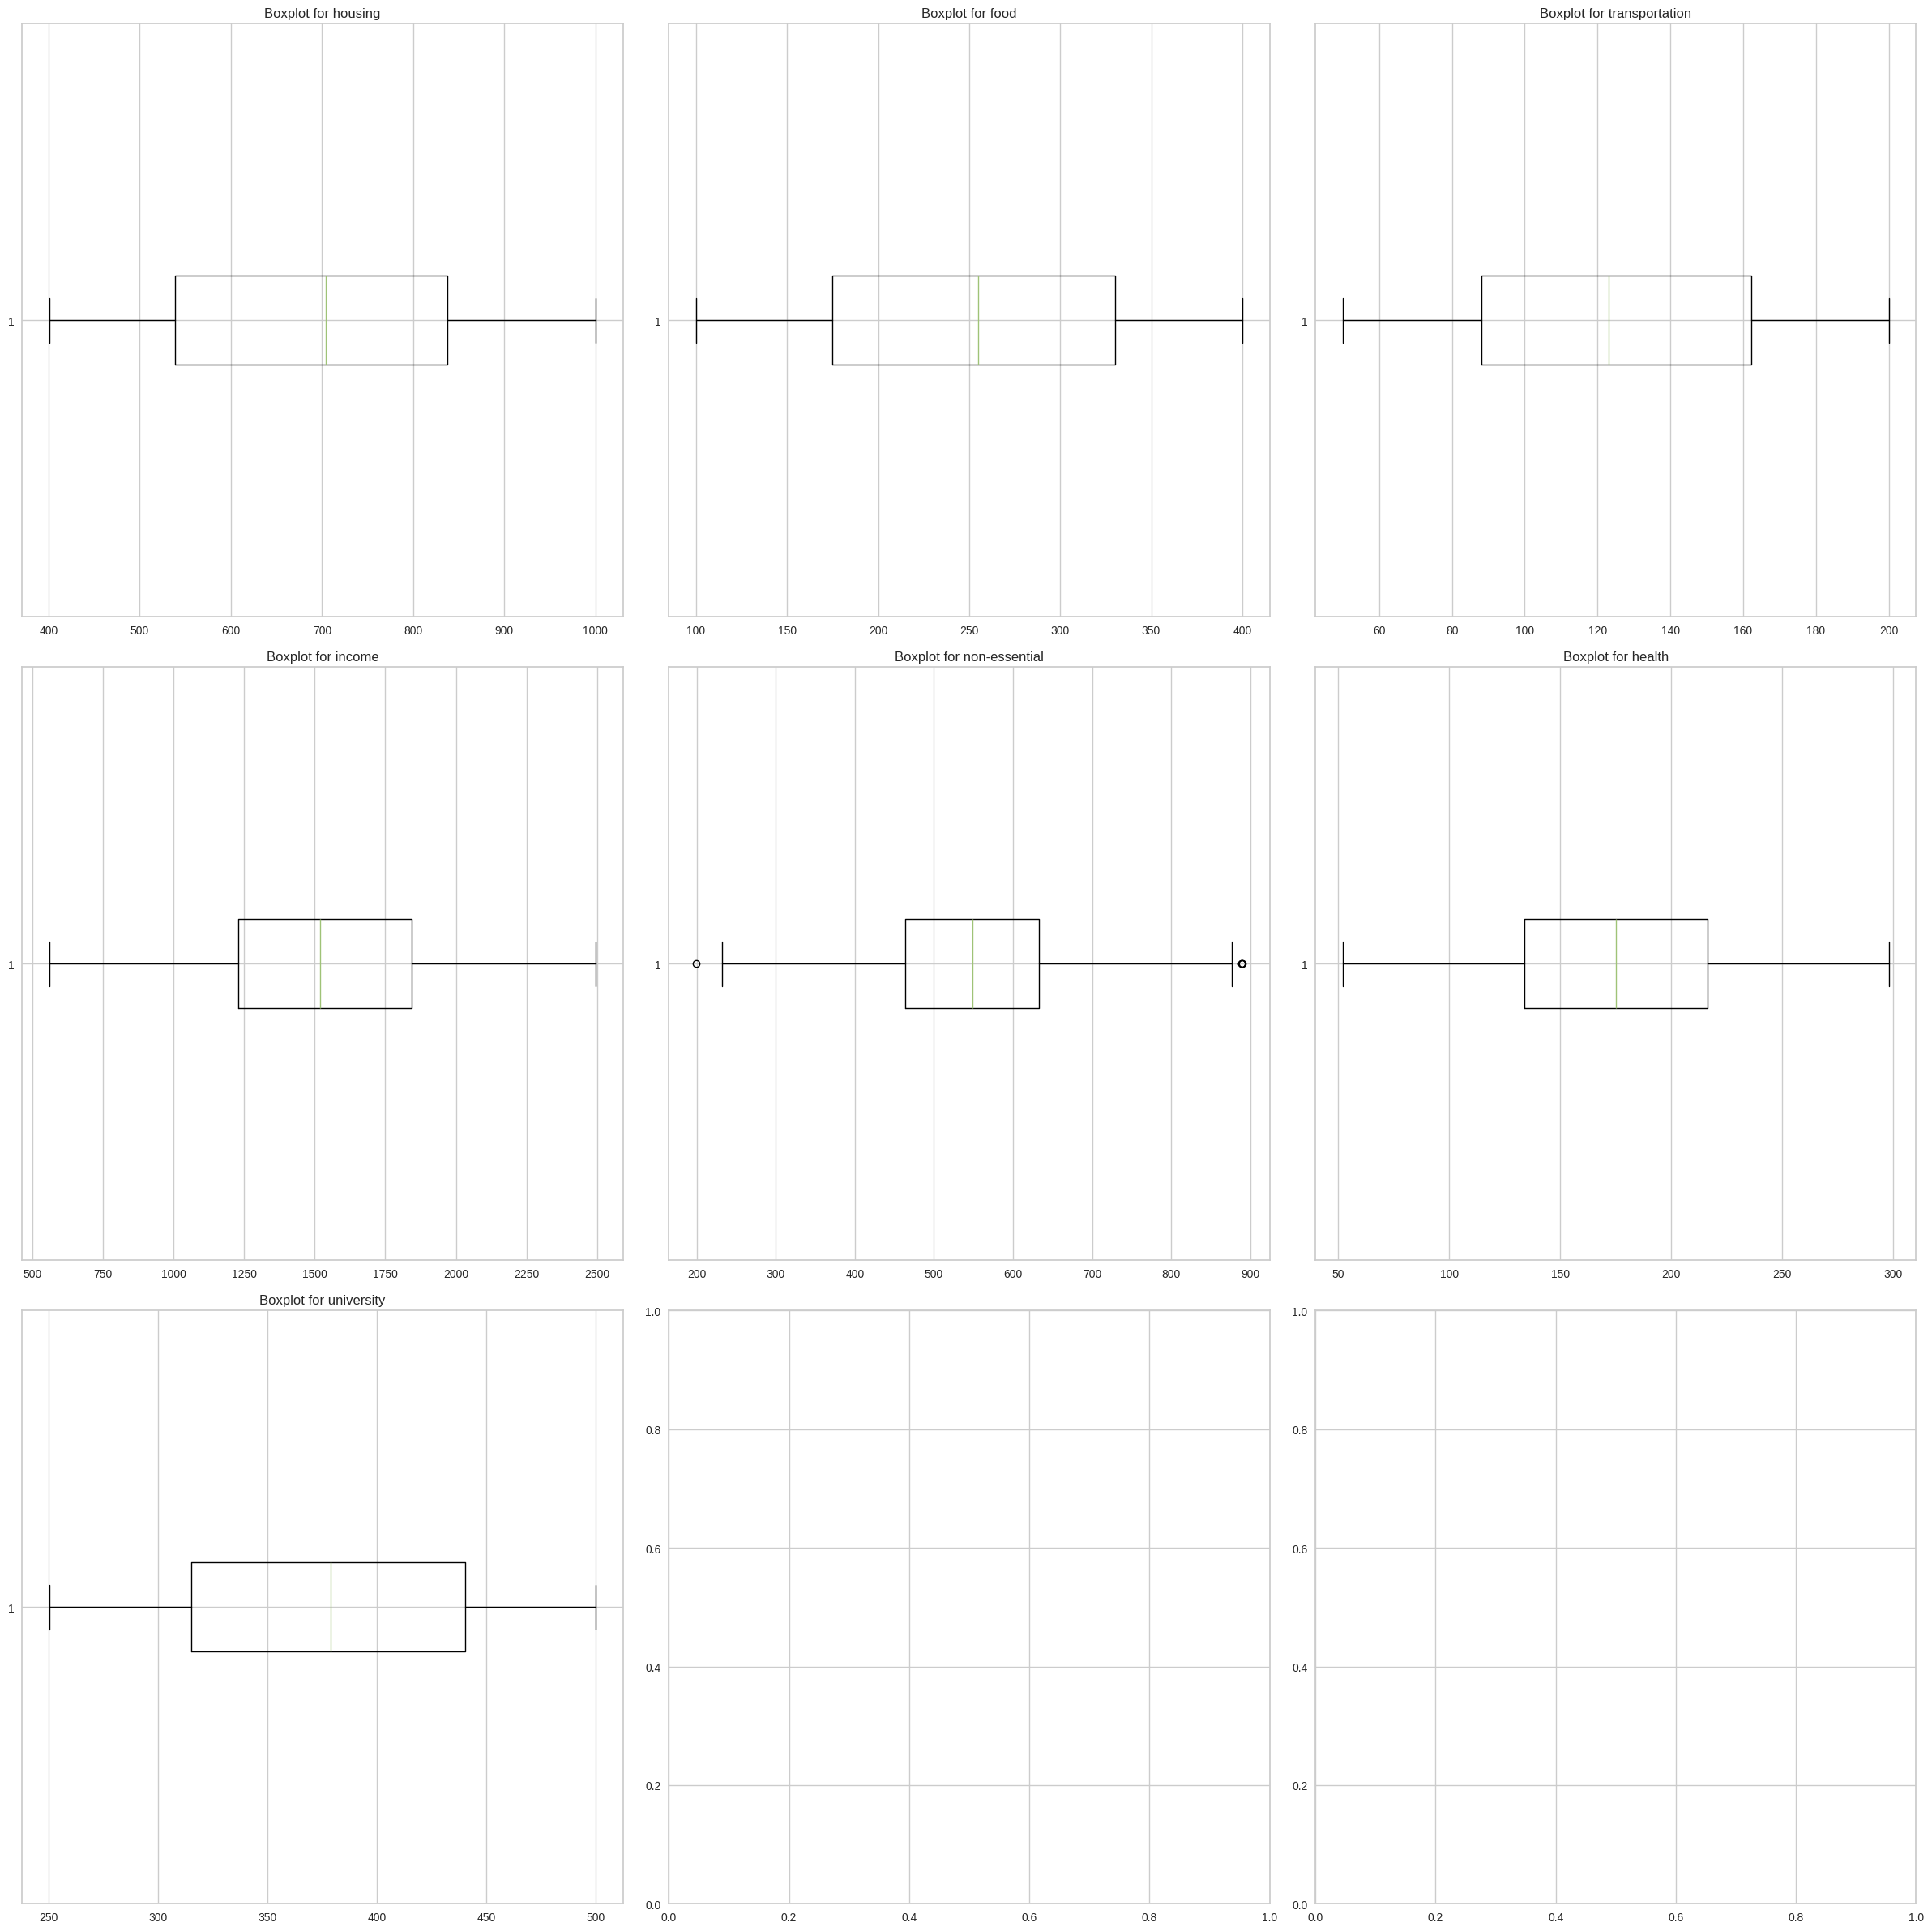

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(24, 24))
axes = axes.flatten()

for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    axes[i].boxplot(df.select_dtypes(include=['number'])[column], vert=False)
    axes[i].set_title(f'Boxplot for {column}')

for j in range(13, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
Q1 = df["non-essential"].quantile(0.25)
Q3 = df["non-essential"].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df["non-essential"] < lower_limit) | (df["non-essential"] > upper_limit)]

print("Outliers:")
outliers.head(10)

Outliers:


,housing,food,transportation,income,non-essential,health,university
36,462,372,147,2025,890,197,327.583333
534,702,146,88,1198,889,122,437.166667
628,534,354,69,606,199,90,421.666667
773,482,306,161,1127,889,246,314.916667


In [15]:
df = df[(df["non-essential"] >= lower_limit) & (df["non-essential"] <= upper_limit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   housing         996 non-null    int64  
 1   food            996 non-null    int64  
 2   transportation  996 non-null    int64  
 3   income          996 non-null    int64  
 4   non-essential   996 non-null    int64  
 5   health          996 non-null    int64  
 6   university      996 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 62.2 KB


In [16]:
df.describe()

,housing,food,transportation,income,non-essential,health,university
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,696.612450,252.473896,124.670683,1526.571285,546.106426,175.054217,376.705070
std,171.189438,86.900314,43.573308,417.552794,120.057786,54.677116,71.782202
min,401.000000,100.000000,50.000000,560.000000,232.000000,52.000000,250.250000
25%,540.000000,175.000000,88.000000,1228.000000,464.000000,134.000000,314.812500
50%,705.500000,255.000000,123.000000,1521.500000,548.500000,175.000000,378.958333
75%,838.000000,330.000000,163.000000,1843.500000,633.000000,216.250000,440.750000
max,1000.000000,400.000000,200.000000,2495.000000,877.000000,298.000000,500.000000


In [17]:
columns_names = df.columns
scaler = MinMaxScaler()
df_pre = scaler.fit_transform(df)
df_pre = pd.DataFrame(df_pre, columns=columns_names)
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   housing         996 non-null    float64
 1   food            996 non-null    float64
 2   transportation  996 non-null    float64
 3   income          996 non-null    float64
 4   non-essential   996 non-null    float64
 5   health          996 non-null    float64
 6   university      996 non-null    float64
dtypes: float64(7)
memory usage: 54.6 KB


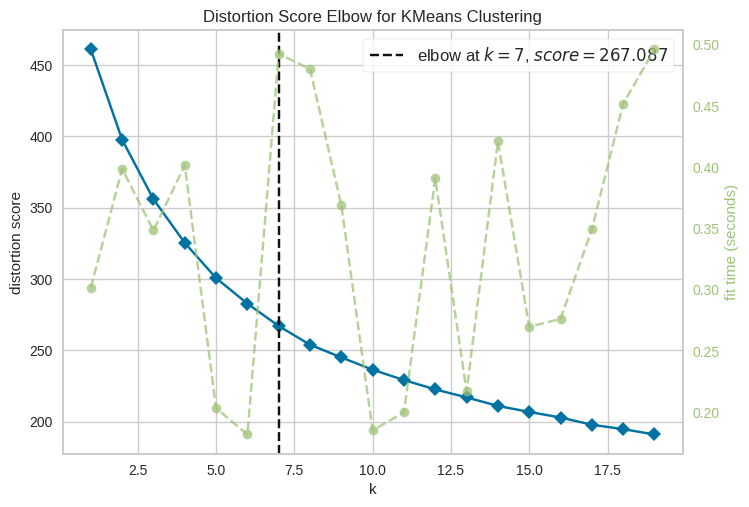

In [18]:
model = KMeans(n_init=50)
visualizer = KElbowVisualizer(model, k=(1, 20))

visualizer.fit(df_pre)
visualizer.show()
plt.show()

In [19]:
model = KMeans(n_clusters=6, random_state=1234, n_init=50)
km = model.fit_predict(df_pre)

print("Centroides:", model.cluster_centers_)
print("Etiquetas:", model.labels_)

Centroides: [[0.42922845 0.76356209 0.51052288 0.50830167 0.51016112 0.48917982
  0.79602315]
 [0.20403956 0.71679293 0.34535354 0.46103281 0.49186047 0.49140798
  0.24291969]
 [0.77017251 0.73421769 0.56970522 0.51855719 0.50430839 0.52878712
  0.23536462]
 [0.2212383  0.28782609 0.69556936 0.55214663 0.48917136 0.5815533
  0.47726816]
 [0.57994157 0.29085    0.1922     0.48120672 0.4414186  0.45394309
  0.50168669]
 [0.73826992 0.28546053 0.73622807 0.47110023 0.49254386 0.46980638
  0.64520441]]
Etiquetas: [0 0 1 0 2 1 0 1 0 1 4 5 5 4 4 2 0 2 4 2 3 5 3 1 4 0 5 0 3 2 0 3 5 0 3 1 3
 4 0 5 0 4 1 2 3 4 4 4 4 0 4 4 4 2 2 3 2 1 0 3 4 5 0 4 5 4 1 5 2 3 0 2 2 5
 5 3 4 5 0 1 0 5 3 1 0 2 2 3 3 0 1 2 5 5 4 3 0 5 2 2 0 1 4 0 1 0 5 4 5 0 0
 4 0 0 2 0 2 4 0 0 2 0 5 2 3 3 2 3 0 2 5 0 4 4 3 5 0 3 5 4 4 0 4 1 2 3 2 0
 3 4 4 2 1 4 3 5 1 0 2 1 4 2 3 1 1 0 3 5 3 5 4 3 4 2 4 4 0 2 1 2 4 0 3 2 4
 2 2 3 5 3 4 4 5 2 3 3 0 2 4 4 0 3 4 2 1 3 3 5 1 0 1 3 3 4 4 0 3 5 5 3 3 4
 0 0 2 5 0 3 5 0 4 1 4 5 2 3 0 1 4 

In [20]:
si_scr = silhouette_score(df_pre, km)
da_scr = davies_bouldin_score(df_pre, km)
print(si_scr)
print(da_scr)

0.13365736287180324
1.7364599708402804


In [21]:
df['Class'] = model.labels_
df.head(5)

,housing,food,transportation,income,non-essential,health,university,Class
0,709,296,123,1228,435,205,494.916667,0
1,557,365,85,1881,620,221,409.000000,0
2,666,220,137,1662,601,135,254.250000,1
3,652,289,114,882,540,135,411.250000,0
4,825,372,168,1332,434,142,323.916667,2


In [22]:
df.to_csv('spending-grouped-classes.csv', index=False)